# Visualization Lab
## Introduction
This lab is designed to help you practice data visualization using Python. It will provide you with an opportunity to practice manipulating and visualizing data using Python libraries such as Pandas, Matplotlib, Seaborn, Plotly, and Bokeh, and will focus on choosing appropriate visualization methods based on data type and research questions.

### Learning Objectives
* Use Pandas to import, clean, and manipulate data.
* Understand the importance of data visualization in data analysis and communication.
* Evaluate and choose appropriate visualization methods based on data type and research questions.
* Create basic to advanced plots, including scatterplots, 3D scatterplots, bubble plots, line charts, histograms, boxplots, heatmaps, and interactive visualizations using:
  * Matplotlib.
  * Seaborn.
  * Plotly
  * Bokeh

**Emojis Legend**
- 👨🏻‍💻 - Instructions; Tells you about something specific you need to do.
- 🦉 - Tips; Will tell you about some hints, tips and best practices
- 📜 - Documentations; provides links to documentations
- 🚩 - Checkpoint; marks a good spot for you to commit your code to git
- 🕵️ - Tester; Don't modify code blocks starting with this emoji

## Setup
* Install this lab's dependencies by running the following command in your terminal:
  ```bash
  pipenv install
  ```
* Make sure you switch to the correct environment by choosing the correct kernel in the top right corner of the notebook.
  * Note: the name for this lab is very similar to the previous lab, so make sure you select the correct one.

#### Package Imports
We will keep coming back to this cell to add "import" statements, and configure libraries as we need

**Task 👨🏻‍💻**: Keep coming back to update this cell as you need to import new packages.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

# Configure pandas to display 500 rows; otherwise it will truncate the output
pd.set_option('display.max_rows', 10)

# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")

### Part 1 Anscombe's Quartet
Visualize Anscombe's Quartet using `Pandas` and `Matplotlib`. The data is available in the `datasets` folder. The data is in the `anscombes_quartet.csv` file. The data is in the following format:
* Four datasets combined into one file; 8 columns and 11 rows, each 2 columns constitute a dataset.

<details>
  <summary>Anscombe's quartet data format looks like this</summary>
  <img width="600" src="https://github.com/IT4063C/images/raw/main/visualization-assignment/anscombes_quartet_format.png" />
</details>

#### 👨🏻‍💻 1.1: Import the data

In [ ]:
# 👨🏻‍💻 - Import the dataset in the project (datasets/anscombes_quartet.csv) into a dataframe called (anscombes_quartet)
anscombes_quartet = pd.read_csv('./datasets/anscombes_quartet.csv')
anscombes_quartet.head()


#### 👨🏻‍💻 1.2: Split the data into four datasets
the imported dataset contains four datasets combined into one file. Each 2 columns constitute a dataset. Split the data into four datasets (df1, df2, df3, df4).

In [ ]:
# 👨🏻‍💻 - Split the dataframe into 4 dataframes (df1, df2, df3, df4), such that each dataframe contains 2 columns (x, y) and 11 rows
# Make sure you rename the columns to (x, y) instead of (`x_I`,`y_I`,`x_II`,`y_II`,`x_III`,`y_III`,`x_IV`,`y_IV`)

df1 = anscombes_quartet[['x_I', 'y_I']].rename(columns={'x_I': 'x', 'y_I': 'y'})
df2 = anscombes_quartet[['x_II', 'y_II']].rename(columns={'x_II': 'x', 'y_II': 'y'})
df3 = anscombes_quartet[['x_III', 'y_III']].rename(columns={'x_III': 'x', 'y_III': 'y'})
df4 = anscombes_quartet[['x_IV', 'y_IV']].rename(columns={'x_IV': 'x', 'y_IV': 'y'})


#### 👨🏻‍💻 1.3: Show a sample of the data for each dataset
show 2 records for each dataset in a single cell.

<details>
  <summary>🦉 Hints</summary>
  
  * You'll need to use the `display` function to display multiple outputs in a single cell.
</details>

In [ ]:
# 👨🏻‍💻 - Get a random sample of 2 records from each dataframe
display(df1.sample(2))
display(df2.sample(2))
display(df3.sample(2))
display(df4.sample(2))


#### 👨🏻‍💻 1.4: Show the statistical summary for each dataset in a single cell

<details>
  <summary>🦉 Hints</summary>
  
  * You'll need to use the `display` function to display multiple outputs in a single cell.
</details>

In [ ]:
# 👨🏻‍💻 - Get the statistical summaries of the 4 dataframes (df1, df2, df3, df4)
display(df1.describe())
display(df2.describe())
display(df3.describe())
display(df4.describe())


**❓ What do you notice and what could this mean?**

Despite the datasets having nearly identical statistical properties, their scatter plots reveal distinct patterns. This highlights the importance of visualizing data rather than relying solely on summary statistics.

> 🚩 : Make a git commit here

#### 👨🏻‍💻 1.5: Plot the data for each dataset
In a single figure, plot a scatterplot of the data in each dataset.

Use `Matplotlib` to plot the data. Each dataset should be plotted in a separate subplot.

In [ ]:
# 👨🏻‍💻 - Plot the 4 dataframes in a 2x2 grid using Matplotlib

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot df1
axs[0, 0].scatter(df1['x'], df1['y'])
axs[0, 0].set_title('Dataset I')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('y')

# Plot df2
axs[0, 1].scatter(df2['x'], df2['y'])
axs[0, 1].set_title('Dataset II')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('y')

# Plot df3
axs[1, 0].scatter(df3['x'], df3['y'])
axs[1, 0].set_title('Dataset III')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('y')

# Plot df4
axs[1, 1].scatter(df4['x'], df4['y'])
axs[1, 1].set_title('Dataset IV')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('y')

plt.tight_layout()
plt.show()


**❓ What do you notice and what does this mean?**

> 🚩 : Make a git commit here

### Part 2: Iris Dataset
In this set of exercises, we'll explore scatterplots and bubble plots.
We will use the Iris Datasets which is available through the `sklearn.datasets` packages, and is imported for you into a `pandas` DataFrame.
- `iris_df` is a `pandas` DataFrame with 150 rows and 5 columns.
- the first 4 columns are the features of the dataset, and the last column is the target: the name of the species
- The target is a categorical variable with 3 unique values: 0, 1, and 2, reflected in the `target_names` series as `setosa`, `versicolor`, `virginica`

#### 👨🏻‍💻 2.1: Import the data (done for you)

In [ ]:
# 👨🏻‍💻 I imported the iris dataset from sklearn and converted it to a dataframe for you
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
iris_df = iris.frame
target_names = iris.target_names

display(target_names)
display(iris_df.head())

#### 👨🏻‍💻 2.2: Show the a summary about the data frame, its columns, and the data types of each column

In [ ]:
iris_df.info()

#### 👨🏻‍💻 2.3: Print a random sample of 6 records from the dataset.

In [ ]:
iris_df.sample(6)

> 🚩 : Make a git commit here

#### 👨🏻‍💻 2.4: Using `Matplotlib` Plot a figure to show the frequency of each of the species types (target) in this data set.

* You'll need to choose the right chart type present the frequency of occurrence of the each of the species types (target) in this data set. 
* Use `Matplotlib` to plot the data.
* Add a title and axis labels to your plot.
* Make sure to add a legend that shows the species **names**.


In [ ]:
# Using Matplotlib
species_counts = iris_df['target'].value_counts().sort_index()
species_names = [iris.target_names[i] for i in species_counts.index]

plt.figure(figsize=(8, 6))
bars = plt.bar(species_names, species_counts, color=['blue', 'orange', 'green'])
plt.title('Frequency of Each Species in the Iris Dataset')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.legend(bars, species_names)
plt.show()


> 🚩 : Make a git commit here

#### 👨🏻‍💻 2.5: Using `Seaborn` Plot a figure to show the frequency of each of the species types (target) in this data set.
Recreate the same plot using `Seaborn`.

c:\Users\Adib Zaman\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adib Zaman\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adib Zaman\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


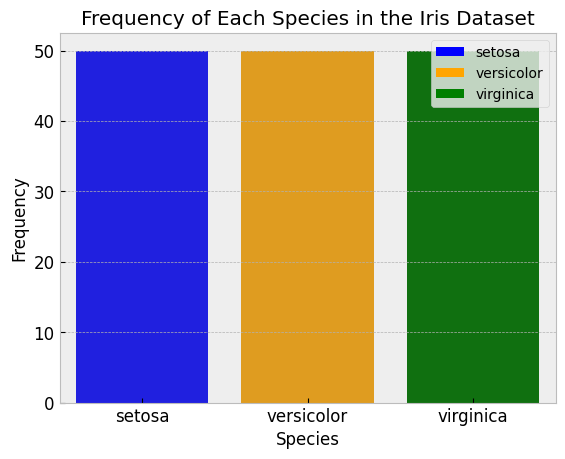

In [17]:
# Using Seaborn
sns.countplot(x='target', data=iris_df, palette=['blue', 'orange', 'green'])
plt.title('Frequency of Each Species in the Iris Dataset')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1, 2], labels=species_names)
plt.legend(bars, species_names)
plt.show()

> 🚩 : Make a git commit here

#### 👨🏻‍💻 2.6: Using `Matplotlib` Plot a figure to show the relationship between variables in the dataset.
* Create a scatterplot matrix using `Matplotlib` to show the relationship between `sepal_length`, and `sepal_width`.
* Add a title and axis labels to your plot.

<details>
  <summary>You should get something like this</summary>
  <img alt="Iris Dataset Scatterplot" src="https://github.com/IT4063C/images/raw/main/visualization-assignment/sepal-length-vs-width.png" />
</details>

> 🚩 : Make a git commit here

#### 👨🏻‍💻 2.7: Plot Improvement
some of dots you see on the charts are overlapping. Let's try to make the dots more transparent.
- Add and set the `alpha` parameter to `0.3` to make it easier to see overlapping values; values occurring more frequently.
- Copy over the previous code and modify it to address the new requirement.

<details>
  <summary>You should get something like this</summary>
  <img alt="Iris Dataset Scatterplot" src="https://github.com/IT4063C/images/raw/main/visualization-assignment/sepal-length-vs-width-2.png" />
</details>

> 🚩 : Make a git commit here

#### 👨🏻‍💻 2.8: More Advanced Plotting
A bubble plot is a scatterplot where the size of the dots are determined by a third variable. In this case, we'll use the petal width as the third variable.

Use [📜the documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to find out the additional option we need to introduce to modify the size of the dots. Set the size of the dots to be _proportional_ to the petal width.


<details>
  <summary>🦉 Hints</summary>
  
  * You'll need to use the `s` parameter to set the size of the dots.
  * Since the petal width is a small number, you may need to multiply it by a large number to make the dots visible. 
    * try different numbers until you're satisfied with the result
</details>

<details>
  <summary>You should get something like this</summary>
  <img alt="Iris Dataset Scatterplot" src="https://github.com/IT4063C/images/raw/main/visualization-assignment/sepal-length-vs-width-3.png" />
</details>

> 🚩 : Make a git commit here

#### 👨🏻‍💻 2.9: Even More Advanced Plotting

**Modify the color of the dots based on the value in the target column.**

We can also introduce a fourth (categorical) variable here using colors. Let's use the species type (target) as the fourth variable.

- Use [📜 the documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

<details>
   <summary>🦉 Hints</summary>

   * You'll need to use the `c` parameter to set the color of the dots.
   * We'll need to use the `cmap` parameter to set the color map (color style/theme).
   *  since the target is a categorical variable of (0,1,2). we will pass the the target column to the `c` parameter.
   * the color map is a lookup table that maps the numbers to colors. I'm using the `viridis` color map.
   * You're welcome to use any other color map.
</details>

<details>
  <summary>You should get something like this</summary>
  <img alt="Iris Dataset Scatterplot" src="https://github.com/IT4063C/images/raw/main/visualization-assignment/sepal-length-vs-width-4.png" />
</details>


> 🚩 : Make a git commit here

#### 👨🏻‍💻 2.10: Rebuild the plot using `Seaborn`
Using the `sns.scatterplot` function, recreate the same plot using `Seaborn`.

<details>
  <summary>You should get something like this</summary>
  <img alt="Iris Dataset Scatterplot" src="https://github.com/IT4063C/images/raw/main/visualization-assignment/sepal-length-vs-width-5.png" />
</details>

> 🚩 : Make a git commit here

#### 👨🏻‍💻 2.11: Rebuild the plot using `plotly`
Use the `px.scatter()` function.


> 🚩 : Make a git commit here

## Part 3: Bitcoin Evolution
In this set of exercises, we'll explore line and area charts.
We will use the Bitcoin Evolution Dataset which is available as a txt file in the `datasets` folder. and is imported for you as a `pandas` DataFrame.
The dataset contains 2 columns: a date, and price of bitcoin in USD.

#### 👨🏻‍💻 3.1: Import the data (done for you)

In [ ]:
bitcoin_df = pd.read_table("./datasets/bitcoin.txt", sep=" ")
bitcoin_df['date']= pd.to_datetime(bitcoin_df['date'])
bitcoin_df.info()

#### 👨🏻‍💻 3.2: Print the last 3 records of the dataset

#### 👨🏻‍💻 3.3: Visualize the data using a line chart
> "A line chart or line graph displays the evolution of one or several numeric variables. Data points are connected by straight line segments. It is similar to a scatter plot except that the measurement points are ordered (typically by their x-axis value) and joined with straight line segments. A line chart is often used to visualize a trend in data over intervals of time – a time series – thus the line is often drawn chronologically." ([Data to Viz - Line Charts](https://www.data-to-viz.com/graph/line.html))

Create a line chart using `matplotlib` to show the evolution of the price of bitcoin over time. Make sure to add a title and axis labels to your plot.

<details>
  <summary>You should get something like this</summary>
  <img alt="Bitcoin evolution" src="https://github.com/IT4063C/images/raw/main/visualization-assignment/bitcoin-line.png" />
</details>


In [ ]:
# 👨🏻‍💻 - Plot the bitcoin price over time, with a wide figure size


> 🚩 : Make a git commit here

#### 👨🏻‍💻 3.4: Rebuild the plot using `plotly` to create an interactive line chart
Note that as you hover over the different data points, you can see the date and the price of bitcoin at that point in time.

<details>
  <summary>You should get something like this</summary>
  <img alt="Interactive Bitcoin Line chart" src="https://github.com/IT4063C/images/raw/main/visualization-assignment/interactive-bitcoin.gif" />
</details>


> 🚩 : Make a git commit here

## Part 4: Popular Names
In this set of exercises, we'll explore some other chart types.
We will use the babies names Dataset which is available as a txt file in the `datasets` folder. and is imported for you as a `pandas` DataFrame.

#### 👨🏻‍💻 4.1: Import the data (done for you)

In [ ]:
babies_wide_df = pd.read_csv("./datasets/names-wide.csv")
babies_wide_df.head()

#### 👨🏻‍💻 4.2: Create a stacked area chart
> "A stacked area chart is the extension of a basic area chart. It displays the evolution of the value of several groups on the same graphic. The values of each group are displayed on top of each other, what allows to check on the same figure the evolution of both the total of a numeric variable, and the importance of each group." ([Data to Viz - Stacked Area Charts](https://www.data-to-viz.com/graph/stackedarea.html))

**Task 👨🏻‍💻**: Using the `babies_wide_df` DataFrame, create an interactive (stacked area chart) to show the evolution of the popularity of the names over time. Make sure to add a title and axis labels to your plot.
You may use either `plotly` or `Bokeh`,

<details>
  <summary>You should get something like this</summary>
  <img alt="Interactive names stacked area chart" src="https://github.com/IT4063C/images/raw/main/visualization-assignment/stacked-names.gif" />
</details>

> 🚩 : Make a git commit here

## Part 5: Word Clouds (not a task)
> "A Wordcloud (or Tag cloud) displays a list of words, the importance of each beeing shown with font size or color. This format is useful for quickly perceiving the most prominent terms." ([Data to Viz - Word Clouds](https://www.data-to-viz.com/graph/wordcloud.html))

This is not a task, but only here to share with you how you can generate word clouds using `wordcloud` and `matplotlib` for your own projects.

In [ ]:
with open('./datasets/martin-luther-king-i-have-a-dream-speech.txt') as f:
    contents = f.read()
print(contents)

In [ ]:
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(contents)
print(wordcloud.words_)

notice how the results is a normalized dataset of all the words. So the most occurring word has a value of 1, and the least occurring word has a value approaching 0.

In [ ]:
import matplotlib.pyplot as plt

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Extra Credits 
### Sunburst Charts
**✨ Extra Credit Task 👨🏻‍💻**: For 3 Points: Explore and produce a `sunburst` chart using `plotly`. You may follow a tutorial here, but make sure you link to the tutorial in your code.

> 🚩 : Make a git commit here

### Snakey Diagrams

>"A Sankey Diagram is a visualisation technique that allows to display flows. Several entities (nodes) are represented by rectangles or text. Their links are represented with arrows or arcs that have a width proportional to the importance of the flow." ([Data to Viz - Sankey Diagrams](https://www.data-to-viz.com/graph/sankey.html))

**✨ Extra Credit Task 👨🏻‍💻**: For 3 Points: Follow [this tutorial](https://www.python-graph-gallery.com/sankey-diagram-with-python-and-plotly) on how to create a Sankey Diagram using `plotly`.


> 🚩 : Make a git commit here

## Wrap Up
> Moved from the README file
### 🤔 Reflection
**How often did you have to check the solution to the problem? How did you feel about that?**
**With hindsight, what would you do differently?**
**What was the most challenging part of this lab?**

## Citations
**Cite any resources you used in solving this assignment**

This includes:
- Individuals other than myself.
- Websites
- Videos
- AI tools such as GitHub Copilot or ChatGPT.

Make sure you run the following cell; this converts this Jupyter notebook to a Python script. and will make the process of reviewing your code on GitHub easier

In [ ]:
# 🦉: The following command converts this Jupyter notebook to a Python script.
!jupyter nbconvert --to python visualization-notebook.ipynb

> 🚩 : Make a git commit here